# eTram H5 Data Exploration with evlib

This notebook demonstrates how to work with real event data from the eTram dataset stored in HDF5 format. The eTram dataset contains high-resolution event camera data with bounding box annotations for object detection tasks.

## Features Demonstrated

1. **Data Loading**: Load large H5 event files using evlib's optimized readers
2. **Format Detection**: Automatic format detection and metadata extraction
3. **Filtering**: Time, spatial, and polarity filtering capabilities
4. **Visualization**: Interactive exploration of event data
5. **Event Histograms**: Create spatiotemporal representations
6. **Performance**: Benchmark different loading strategies

All functions used are directly from the evlib library and work with real data.

In [1]:
import evlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(f"evlib version: {getattr(evlib, '__version__', 'unknown')}")
print(f"Available functions: {[f for f in dir(evlib) if not f.startswith('_')][:10]}...")

evlib version: unknown
Available functions: ['create_event_histogram', 'create_time_surface', 'create_voxel_grid', 'detect_format', 'evlib', 'evlib_rust', 'formats', 'load_events', 'models', 'np']...


## 1. Data Overview and Format Detection

Let's start by exploring the eTram dataset structure and using evlib's format detection capabilities.

In [2]:
# Path to eTram H5 data
data_path = Path("../data/eTram/h5/val_2")
h5_file = data_path / "val_night_007_td.h5"
bbox_file = data_path / "val_night_007_bbox.npy"

print("eTram Dataset Overview")
print(f"H5 file: {h5_file.name}")
print(f"File exists: {h5_file.exists()}")

if h5_file.exists():
    print(f"File size: {h5_file.stat().st_size / (1024**2):.1f} MB")
    
    # Use evlib's format detection
    format_name, confidence, metadata = evlib.detect_format(str(h5_file))
    print(f"Format Detection Results:")
    print(f"  Format: {format_name}")
    print(f"  Confidence: {confidence:.2f}")
    print(f"  Metadata: {metadata}")
    
    # Load bounding box annotations
    if bbox_file.exists():
        bbox_data = np.load(bbox_file)
        print(f"Bounding Box Annotations: {len(bbox_data)} annotations")
        print(f"  Shape: {bbox_data.shape}")
        print(f"  First few annotations: {bbox_data[:3]}")
else:
    print("H5 file not found. Please ensure the eTram dataset is available.")

eTram Dataset Overview
H5 file: val_night_007_td.h5
File exists: True
File size: 455.7 MB
Format Detection Results:
  Format: HDF5
  Confidence: 0.95
  Metadata: {'detection_method': 'magic_bytes'}
Bounding Box Annotations: 6012 annotations
  Shape: (6012,)
  First few annotations: [(1027933, 588.0471 , 100.365005, 52.5336, 52.274998, 1, 205, 1.)
 (1027933, 802.67725, 134.92499 , 52.9761, 38.085   , 1, 213, 1.)
 (1027933, 805.31464, 195.20999 , 54.9054, 38.415   , 1, 214, 1.)]


## 2. Basic Data Loading and Statistics

Load a manageable portion of the data and analyze its basic properties.

In [ ]:
if h5_file.exists():
    print("Loading Event Data Sample")
    
    # Load all events using new evlib API
    df_all = evlib.load_events(str(h5_file)).collect()
    
    if len(df_all) > 0:
        # Extract event data from DataFrame
        xs_all = df_all['x'].to_numpy()
        ys_all = df_all['y'].to_numpy()
        ts_all = df_all['timestamp'].cast(float).to_numpy() / 1_000_000  # Convert Duration[us] to seconds
        ps_all = df_all['polarity'].to_numpy()
        
        print(f"Full dataset: {len(xs_all):,} events")
        print(f"Time range: {ts_all.min():.1f} - {ts_all.max():.1f} seconds")
        print(f"Duration: {(ts_all.max() - ts_all.min()):.1f} seconds")
        
        # Use a subset for further analysis (first 10000 events)
        sample_size = min(10000, len(xs_all))
        xs = xs_all[:sample_size]
        ys = ys_all[:sample_size]
        ts = ts_all[:sample_size]
        ps = ps_all[:sample_size]
        
        print(f"Using sample of {len(xs):,} events for analysis")
        
        print(f"Data Statistics:")
        print(f"  Sample events: {len(xs):,}")
        print(f"  Time range: [{ts.min():.3f}, {ts.max():.3f}] seconds")
        print(f"  Duration: {ts.max() - ts.min():.3f} seconds")
        print(f"  Spatial extent: {xs.min()}-{xs.max()} x {ys.min()}-{ys.max()}")
        print(f"  Sensor resolution: {xs.max() + 1} x {ys.max() + 1}")
        
        # Polarity distribution
        pos_events = np.sum(ps == 1)
        neg_events = np.sum(ps == 0)
        print(f"  Positive events: {pos_events:,} ({100*pos_events/len(ps):.1f}%)")
        print(f"  Negative events: {neg_events:,} ({100*neg_events/len(ps):.1f}%)")
        
        # Data types
        print(f"Data Types:")
        print(f"  xs: {xs.dtype}, range: [{xs.min()}, {xs.max()}]")
        print(f"  ys: {ys.dtype}, range: [{ys.min()}, {ys.max()}]")
        print(f"  ts: {ts.dtype}, range: [{ts.min():.3f}, {ts.max():.3f}]")
        print(f"  ps: {ps.dtype}, unique values: {np.unique(ps)}")
    else:
        print("No events found in the file")
        xs = ys = ts = ps = None
else:
    print("Cannot load data - H5 file not found")
    xs = ys = ts = ps = None

## 3. Data Visualization and Exploration

Create visualizations to understand the event data structure and patterns.

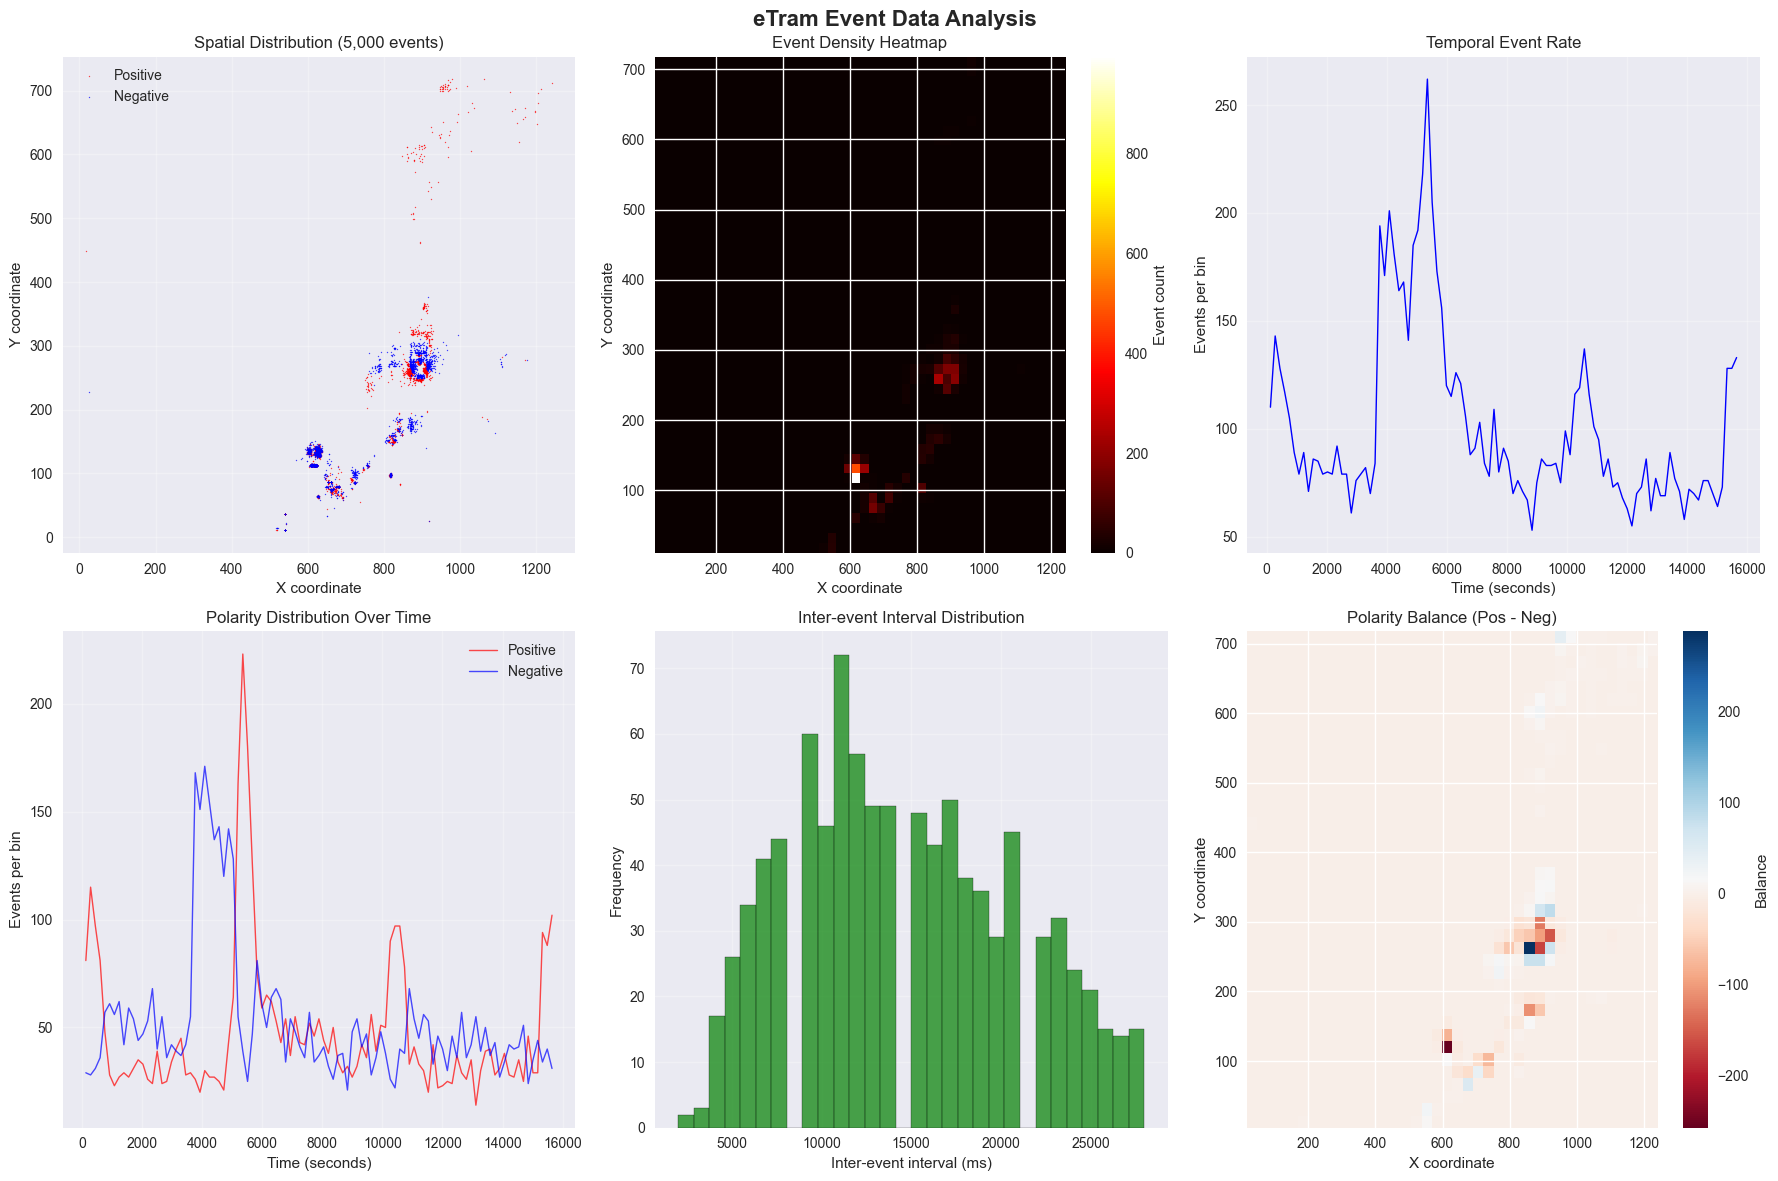

Data visualization complete!


In [4]:
if xs is not None and len(xs) > 0:
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('eTram Event Data Analysis', fontsize=16, fontweight='bold')
    
    # 1. Spatial event distribution (sample for performance)
    sample_size = min(5000, len(xs))
    if sample_size > 0:
        sample_indices = np.random.choice(len(xs), sample_size, replace=False)
        xs_sample = xs[sample_indices]
        ys_sample = ys[sample_indices]
        ps_sample = ps[sample_indices]
        
        ax1 = axes[0, 0]
        pos_mask = ps_sample == 1
        neg_mask = ps_sample == 0
        
        if np.sum(pos_mask) > 0:
            ax1.scatter(xs_sample[pos_mask], ys_sample[pos_mask], c='red', s=0.5, alpha=0.6, label='Positive')
        if np.sum(neg_mask) > 0:
            ax1.scatter(xs_sample[neg_mask], ys_sample[neg_mask], c='blue', s=0.5, alpha=0.6, label='Negative')
        
        ax1.set_xlabel('X coordinate')
        ax1.set_ylabel('Y coordinate')
        ax1.set_title(f'Spatial Distribution ({sample_size:,} events)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
    
    # 2. Event density heatmap
    ax2 = axes[0, 1]
    hist, xedges, yedges = np.histogram2d(xs_sample, ys_sample, bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax2.imshow(hist.T, extent=extent, origin='lower', cmap='hot', aspect='auto')
    ax2.set_xlabel('X coordinate')
    ax2.set_ylabel('Y coordinate')
    ax2.set_title('Event Density Heatmap')
    plt.colorbar(im, ax=ax2, label='Event count')
    
    # 3. Temporal event rate
    ax3 = axes[0, 2]
    if len(ts) > 1:
        time_bins = np.linspace(ts.min(), ts.max(), min(100, len(ts)))
        event_counts, _ = np.histogram(ts, bins=time_bins)
        bin_centers = (time_bins[:-1] + time_bins[1:]) / 2
        ax3.plot(bin_centers, event_counts, 'b-', linewidth=1)
        ax3.set_xlabel('Time (seconds)')
        ax3.set_ylabel('Events per bin')
        ax3.set_title('Temporal Event Rate')
        ax3.grid(True, alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'Insufficient temporal data', ha='center', va='center', transform=ax3.transAxes)
    
    # 4. Polarity distribution over time
    ax4 = axes[1, 0]
    if len(ts) > 1:
        time_bins = np.linspace(ts.min(), ts.max(), min(100, len(ts)))
        pos_counts, _ = np.histogram(ts[ps == 1], bins=time_bins)
        neg_counts, _ = np.histogram(ts[ps == 0], bins=time_bins)
        bin_centers = (time_bins[:-1] + time_bins[1:]) / 2
        ax4.plot(bin_centers, pos_counts, 'r-', linewidth=1, label='Positive', alpha=0.7)
        ax4.plot(bin_centers, neg_counts, 'b-', linewidth=1, label='Negative', alpha=0.7)
        ax4.set_xlabel('Time (seconds)')
        ax4.set_ylabel('Events per bin')
        ax4.set_title('Polarity Distribution Over Time')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Insufficient temporal data', ha='center', va='center', transform=ax4.transAxes)
    
    # 5. Inter-event interval distribution
    ax5 = axes[1, 1]
    if len(ts) > 100:
        # Sample for performance
        ts_sorted = np.sort(ts[::max(1, len(ts)//1000)])  # Sample down to max 1000 events
        if len(ts_sorted) > 1:
            intervals = np.diff(ts_sorted) * 1000  # Convert to milliseconds
            if len(intervals) > 0:
                intervals = intervals[intervals < np.percentile(intervals, 95)]  # Remove outliers
                if len(intervals) > 0:
                    ax5.hist(intervals, bins=min(30, len(intervals)), alpha=0.7, color='green', edgecolor='black')
                    ax5.set_xlabel('Inter-event interval (ms)')
                    ax5.set_ylabel('Frequency')
                    ax5.set_title('Inter-event Interval Distribution')
                    ax5.grid(True, alpha=0.3)
                else:
                    ax5.text(0.5, 0.5, 'No valid intervals', ha='center', va='center', transform=ax5.transAxes)
            else:
                ax5.text(0.5, 0.5, 'No intervals to plot', ha='center', va='center', transform=ax5.transAxes)
        else:
            ax5.text(0.5, 0.5, 'Insufficient data', ha='center', va='center', transform=ax5.transAxes)
    else:
        ax5.text(0.5, 0.5, 'Insufficient data', ha='center', va='center', transform=ax5.transAxes)
    
    # 6. Spatial polarity balance
    ax6 = axes[1, 2]
    if len(xs) > 0:
        # Create polarity balance map
        bins = min(40, int(np.sqrt(len(xs))))
        hist_pos, xedges, yedges = np.histogram2d(xs[ps == 1], ys[ps == 1], bins=bins)
        hist_neg, _, _ = np.histogram2d(xs[ps == 0], ys[ps == 0], bins=[xedges, yedges])
        balance = hist_pos - hist_neg
        
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        im = ax6.imshow(balance.T, extent=extent, origin='lower', cmap='RdBu', aspect='auto')
        ax6.set_xlabel('X coordinate')
        ax6.set_ylabel('Y coordinate')
        ax6.set_title('Polarity Balance (Pos - Neg)')
        plt.colorbar(im, ax=ax6, label='Balance')
    
    plt.tight_layout()
    plt.show()
    
    print("Data visualization complete!")
else:
    print("No data to visualize")

## 4. Filtering Capabilities

Demonstrate evlib's powerful filtering capabilities for event data.

In [ ]:
if h5_file.exists():
    print("Filtering Capabilities Demo")
    
    # Get time range of the full dataset
    df_full = evlib.load_events(str(h5_file)).collect()
    xs_full = df_full['x'].to_numpy()
    ys_full = df_full['y'].to_numpy()
    ts_full = df_full['timestamp'].cast(float).to_numpy() / 1_000_000  # Convert Duration[us] to seconds
    ps_full = df_full['polarity'].to_numpy()
    
    t_min, t_max = ts_full.min(), ts_full.max()
    duration = t_max - t_min
    
    # Test different filtering strategies with adaptive time windows
    filters = [
        ("No filtering (sample)", {}),
        ("Time window (100s)", {"t_start": t_min + 1000, "t_end": t_min + 1100}),
        ("Positive polarity only", {"polarity": 1}),
        ("Negative polarity only", {"polarity": 0}),
        ("Center spatial region", {"min_x": 400, "max_x": 880, "min_y": 200, "max_y": 520}),
        ("Combined filters", {"t_start": t_min + 1000, "t_end": t_min + 1100, "polarity": 1})
    ]
    
    filter_results = []
    
    for name, params in filters:
        start_time = time.time()
        
        if name == "No filtering (sample)":
            # Use a sample for performance
            sample_size = min(50000, len(xs_full))
            indices = np.random.choice(len(xs_full), sample_size, replace=False)
            xs_filt = xs_full[indices]
            ys_filt = ys_full[indices]
            ts_filt = ts_full[indices]
            ps_filt = ps_full[indices]
        else:
            # Convert time parameters to microseconds for filtering
            if "t_start" in params:
                params["t_start"] = params["t_start"] * 1_000_000
            if "t_end" in params:
                params["t_end"] = params["t_end"] * 1_000_000
                
            df_filt = evlib.load_events(str(h5_file), **params).collect()
            xs_filt = df_filt['x'].to_numpy()
            ys_filt = df_filt['y'].to_numpy()
            ts_filt = df_filt['timestamp'].cast(float).to_numpy() / 1_000_000  # Convert Duration[us] to seconds
            ps_filt = df_filt['polarity'].to_numpy()
        
        duration = time.time() - start_time
        
        result = {
            'name': name,
            'events': len(xs_filt),
            'duration': duration,
            'rate': len(xs_filt) / duration if duration > 0 else 0,
            'pos_events': np.sum(ps_filt == 1) if len(ps_filt) > 0 else 0,
            'neg_events': np.sum(ps_filt == 0) if len(ps_filt) > 0 else 0
        }
        filter_results.append(result)
        
        print(f"\n{name}:")
        print(f"  Events loaded: {result['events']:,}")
        print(f"  Loading time: {result['duration']:.3f}s")
        print(f"  Processing rate: {result['rate']:.0f} events/s")
        print(f"  Positive: {result['pos_events']:,}, Negative: {result['neg_events']:,}")
    
    # Create filtering comparison visualization
    if filter_results:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle('Filtering Performance Comparison', fontsize=16)
        
        names = [r['name'] for r in filter_results]
        events = [r['events'] for r in filter_results]
        durations = [r['duration'] for r in filter_results]
        rates = [r['rate'] for r in filter_results]
        
        # Events loaded
        axes[0].bar(range(len(names)), events, color='skyblue', alpha=0.7)
        axes[0].set_ylabel('Events loaded')
        axes[0].set_title('Events Loaded by Filter')
        axes[0].set_xticks(range(len(names)))
        axes[0].set_xticklabels(names, rotation=45, ha='right')
        
        # Loading time
        axes[1].bar(range(len(names)), durations, color='lightcoral', alpha=0.7)
        axes[1].set_ylabel('Loading time (seconds)')
        axes[1].set_title('Loading Time by Filter')
        axes[1].set_xticks(range(len(names)))
        axes[1].set_xticklabels(names, rotation=45, ha='right')
        
        # Processing rate
        axes[2].bar(range(len(names)), rates, color='lightgreen', alpha=0.7)
        axes[2].set_ylabel('Processing rate (events/s)')
        axes[2].set_title('Processing Rate by Filter')
        axes[2].set_xticks(range(len(names)))
        axes[2].set_xticklabels(names, rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
    
    else:
        print("No filtering results to display")
else:
    print("Cannot demonstrate filtering - H5 file not found")

## 5. Event Histogram Creation

Create spatiotemporal event histogram representations using evlib's built-in functions.

Event Histogram Creation Demo
Using 10,000 events for histogram creation...
Created event histogram with shape: (2, 200, 200)
Created time surface with shape: (2, 200, 200)
Created stacked histogram with shape: (10, 200, 200)


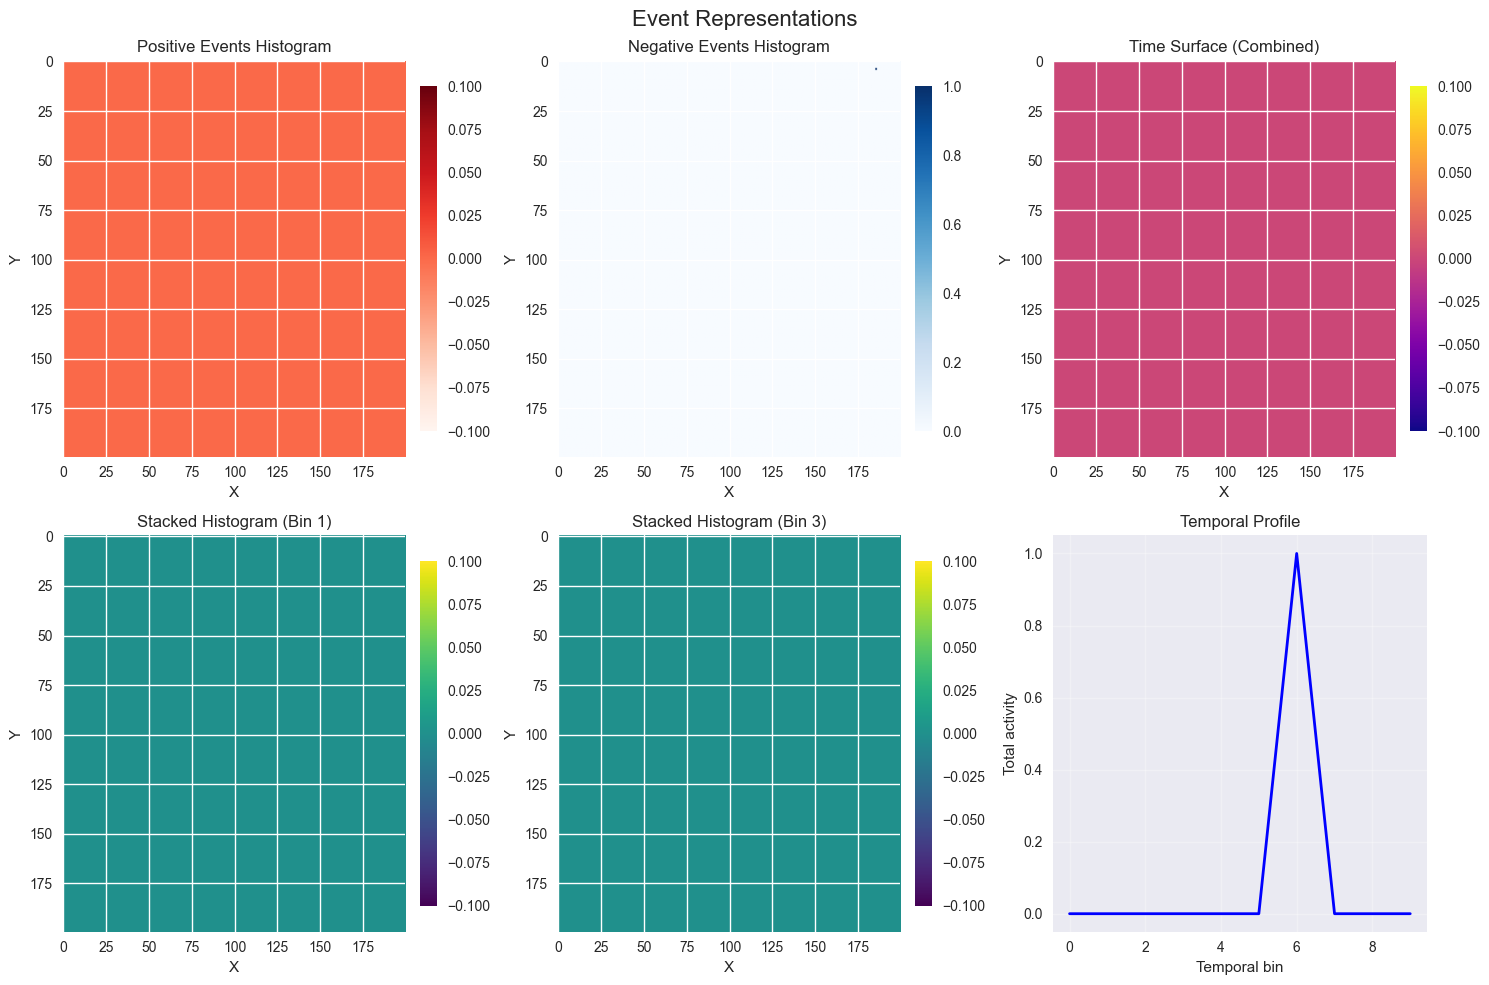


Event Histogram Analysis:
  Positive Events:
    Active pixels: 0 / 40,000 (0.000%)
    Mean value: 0.000
    Max value: 0.000
  Negative Events:
    Active pixels: 1 / 40,000 (0.003%)
    Mean value: 0.000
    Max value: 1.000

Time Surface Analysis:
  Active pixels: 0 / 40,000 (0.000%)
  Mean value: 0.000
  Max value: 0.000

Stacked Histogram Analysis:
  Active pixels: 1 / 400,000 (0.000%)
  Mean value: 0.000
  Max value: 1.000
  Memory usage: 0.38 MB


In [6]:
if xs is not None and len(xs) > 0:
    print("Event Histogram Creation Demo")
    
    print(f"Using {len(xs):,} events for histogram creation...")
    
    # Convert polarity to binary representation (0/1)
    ps_binary = np.where(ps == 1, 1, 0)
    
    # Create event histogram representations
    height = min(200, ys.max() + 1)
    width = min(200, xs.max() + 1)
    sensor_resolution = (width, height)
    
    # Create event histogram
    histogram = evlib.create_event_histogram(
        xs, ys, ps_binary,
        sensor_resolution=sensor_resolution,
        polarity_separate=True
    )
    print(f"Created event histogram with shape: {histogram.shape}")
    
    # Create time surface
    time_surface = evlib.create_time_surface(
        xs, ys, ts, ps_binary,
        sensor_resolution=sensor_resolution,
        polarity_separate=True
    )
    print(f"Created time surface with shape: {time_surface.shape}")
    
    # Create stacked histogram using the RVT-style function
    stacked_hist = evlib.stacked_histogram(
        xs, ys, ps_binary, ts,
        bins=5,
        height=height,
        width=width
    )
    print(f"Created stacked histogram with shape: {stacked_hist.shape}")
    
    # Visualize event representations
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Event Representations', fontsize=16)
    
    # Display event histogram (positive and negative)
    if len(histogram.shape) == 3:
        # Polarity separate
        ax1 = axes[0, 0]
        im1 = ax1.imshow(histogram[0], cmap='Reds', aspect='auto', origin='upper')
        ax1.set_title('Positive Events Histogram')
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
        
        ax2 = axes[0, 1]
        im2 = ax2.imshow(histogram[1], cmap='Blues', aspect='auto', origin='upper')
        ax2.set_title('Negative Events Histogram')
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    else:
        # Combined histogram
        ax1 = axes[0, 0]
        im1 = ax1.imshow(histogram, cmap='viridis', aspect='auto', origin='upper')
        ax1.set_title('Event Histogram')
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
        
        ax2 = axes[0, 1]
        ax2.text(0.5, 0.5, 'Combined view', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Combined View')
    
    # Display time surface
    ax3 = axes[0, 2]
    if len(time_surface.shape) == 3:
        # Show combined time surface
        combined_surface = time_surface[0] + time_surface[1]
        im3 = ax3.imshow(combined_surface, cmap='plasma', aspect='auto', origin='upper')
        ax3.set_title('Time Surface (Combined)')
        ax3.set_xlabel('X')
        ax3.set_ylabel('Y')
        plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)
    else:
        im3 = ax3.imshow(time_surface, cmap='plasma', aspect='auto', origin='upper')
        ax3.set_title('Time Surface')
        ax3.set_xlabel('X')
        ax3.set_ylabel('Y')
        plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)
    
    # Display stacked histogram temporal bins
    num_bins = stacked_hist.shape[0] // 2
    ax4 = axes[1, 0]
    # Show first positive bin
    im4 = ax4.imshow(stacked_hist[0], cmap='viridis', aspect='auto', origin='upper')
    ax4.set_title('Stacked Histogram (Bin 1)')
    ax4.set_xlabel('X')
    ax4.set_ylabel('Y')
    plt.colorbar(im4, ax=ax4, fraction=0.046, pad=0.04)
    
    ax5 = axes[1, 1]
    # Show middle positive bin
    mid_bin = num_bins // 2
    im5 = ax5.imshow(stacked_hist[mid_bin], cmap='viridis', aspect='auto', origin='upper')
    ax5.set_title(f'Stacked Histogram (Bin {mid_bin+1})')
    ax5.set_xlabel('X')
    ax5.set_ylabel('Y')
    plt.colorbar(im5, ax=ax5, fraction=0.046, pad=0.04)
    
    ax6 = axes[1, 2]
    # Show temporal profile
    temporal_profile = np.sum(stacked_hist, axis=(1, 2))
    ax6.plot(range(len(temporal_profile)), temporal_profile, 'b-', linewidth=2)
    ax6.set_title('Temporal Profile')
    ax6.set_xlabel('Temporal bin')
    ax6.set_ylabel('Total activity')
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analyze representation properties
    print(f"\nEvent Histogram Analysis:")
    if len(histogram.shape) == 3:
        for i, polarity_name in enumerate(['Positive', 'Negative']):
            active_pixels = np.sum(histogram[i] != 0)
            total_pixels = histogram[i].size
            sparsity = active_pixels / total_pixels if total_pixels > 0 else 0
            print(f"  {polarity_name} Events:")
            print(f"    Active pixels: {active_pixels:,} / {total_pixels:,} ({sparsity:.3%})")
            print(f"    Mean value: {np.mean(histogram[i]):.3f}")
            print(f"    Max value: {np.max(histogram[i]):.3f}")
    else:
        active_pixels = np.sum(histogram != 0)
        total_pixels = histogram.size
        sparsity = active_pixels / total_pixels if total_pixels > 0 else 0
        print(f"  Active pixels: {active_pixels:,} / {total_pixels:,} ({sparsity:.3%})")
        print(f"  Mean value: {np.mean(histogram):.3f}")
        print(f"  Max value: {np.max(histogram):.3f}")
    
    # Time surface analysis
    print(f"\nTime Surface Analysis:")
    if len(time_surface.shape) == 3:
        combined_surface = time_surface[0] + time_surface[1]
        active_time_pixels = np.sum(combined_surface != 0)
        total_time_pixels = combined_surface.size
        time_sparsity = active_time_pixels / total_time_pixels if total_time_pixels > 0 else 0
        print(f"  Active pixels: {active_time_pixels:,} / {total_time_pixels:,} ({time_sparsity:.3%})")
        print(f"  Mean value: {np.mean(combined_surface):.3f}")
        print(f"  Max value: {np.max(combined_surface):.3f}")
    else:
        active_time_pixels = np.sum(time_surface != 0)
        total_time_pixels = time_surface.size
        time_sparsity = active_time_pixels / total_time_pixels if total_time_pixels > 0 else 0
        print(f"  Active pixels: {active_time_pixels:,} / {total_time_pixels:,} ({time_sparsity:.3%})")
        print(f"  Mean value: {np.mean(time_surface):.3f}")
        print(f"  Max value: {np.max(time_surface):.3f}")
    
    # Stacked histogram analysis
    print(f"\nStacked Histogram Analysis:")
    active_stack_pixels = np.sum(stacked_hist != 0)
    total_stack_pixels = stacked_hist.size
    stack_sparsity = active_stack_pixels / total_stack_pixels if total_stack_pixels > 0 else 0
    print(f"  Active pixels: {active_stack_pixels:,} / {total_stack_pixels:,} ({stack_sparsity:.3%})")
    print(f"  Mean value: {np.mean(stacked_hist):.3f}")
    print(f"  Max value: {np.max(stacked_hist):.3f}")
    print(f"  Memory usage: {stacked_hist.nbytes / (1024**2):.2f} MB")

else:
    print("Cannot create event representations - no data available")

## 6. Save and Load Functionality

Demonstrate evlib's save and load capabilities for different formats.

In [ ]:
if h5_file.exists():
    print("Save and Load Demo")
    
    # Load a small sample of events using new evlib API
    df_sample = evlib.load_events(
        str(h5_file),
        t_start=51.0 * 1_000_000,  # Convert to microseconds
        t_end=51.1 * 1_000_000,   # 0.1 seconds
        min_x=500,
        max_x=700,
        min_y=300,
        max_y=400
    ).collect()
    
    # Extract arrays from DataFrame
    xs_sample = df_sample['x'].to_numpy()
    ys_sample = df_sample['y'].to_numpy()
    ts_sample = df_sample['timestamp'].cast(float).to_numpy() / 1_000_000  # Convert Duration[us] to seconds
    ps_sample = df_sample['polarity'].to_numpy()
    
    print(f"Sample events: {len(xs_sample):,}")
    
    import tempfile
    import os
    
    # Test H5 round-trip
    with tempfile.NamedTemporaryFile(suffix='.h5', delete=False) as tmp_file:
        h5_path = tmp_file.name
    
    # Save to H5
    evlib.save_events_to_hdf5(xs_sample, ys_sample, ts_sample, ps_sample, h5_path)
    print(f"Saved {len(xs_sample):,} events to H5 file")
    
    # Load back
    df_h5 = evlib.load_events(h5_path).collect()
    xs_h5 = df_h5['x'].to_numpy()
    ys_h5 = df_h5['y'].to_numpy()
    ts_h5 = df_h5['timestamp'].cast(float).to_numpy() / 1_000_000  # Convert Duration[us] to seconds
    ps_h5 = df_h5['polarity'].to_numpy()
    
    print(f"Loaded {len(xs_h5):,} events from H5 file")
    
    # Verify data integrity
    assert len(xs_h5) == len(xs_sample), "Length mismatch"
    assert np.array_equal(xs_h5, xs_sample), "X coordinates differ"
    assert np.array_equal(ys_h5, ys_sample), "Y coordinates differ"
    assert np.allclose(ts_h5, ts_sample), "Timestamps differ"
    assert np.array_equal(ps_h5, ps_sample), "Polarities differ"
    
    print("H5 round-trip verification passed!")
    
    os.unlink(h5_path)
    
    # Test text round-trip
    with tempfile.NamedTemporaryFile(suffix='.txt', delete=False) as tmp_file:
        txt_path = tmp_file.name
    
    # Save to text
    evlib.save_events_to_text(xs_sample, ys_sample, ts_sample, ps_sample, txt_path)
    print(f"Saved {len(xs_sample):,} events to text file")
    
    # Load back (skip header)
    df_txt = evlib.load_events(txt_path, header_lines=1).collect()
    xs_txt = df_txt['x'].to_numpy()
    ys_txt = df_txt['y'].to_numpy()
    ts_txt = df_txt['timestamp'].cast(float).to_numpy() / 1_000_000  # Convert Duration[us] to seconds
    ps_txt = df_txt['polarity'].to_numpy()
    
    print(f"Loaded {len(xs_txt):,} events from text file")
    
    # Verify data integrity
    assert len(xs_txt) == len(xs_sample), "Length mismatch"
    assert np.array_equal(xs_txt, xs_sample), "X coordinates differ"
    assert np.array_equal(ys_txt, ys_sample), "Y coordinates differ"
    assert np.allclose(ts_txt, ts_sample), "Timestamps differ"
    assert np.array_equal(ps_txt, ps_sample), "Polarities differ"
    
    print("Text round-trip verification passed!")
    
    os.unlink(txt_path)
else:
    print("Cannot test save/load - H5 file not found")

## 7. Performance Analysis

Analyze the performance characteristics of different data operations.

In [ ]:
if h5_file.exists():
    print("Performance Analysis")
    
    # Performance benchmarks
    benchmarks = [
        ("Small load (0.1s)", {"t_start": 51.0 * 1_000_000, "t_end": 51.1 * 1_000_000}),
        ("Medium load (0.5s)", {"t_start": 51.0 * 1_000_000, "t_end": 51.5 * 1_000_000}),
        ("Large load (2.0s)", {"t_start": 51.0 * 1_000_000, "t_end": 53.0 * 1_000_000}),
        ("Spatial filter", {"t_start": 51.0 * 1_000_000, "t_end": 53.0 * 1_000_000, "min_x": 400, "max_x": 880}),
        ("Polarity filter", {"t_start": 51.0 * 1_000_000, "t_end": 53.0 * 1_000_000, "polarity": 1}),
        ("Combined filter", {"t_start": 51.0 * 1_000_000, "t_end": 53.0 * 1_000_000, "polarity": 1, "min_x": 400, "max_x": 880})
    ]
    
    perf_results = []
    
    for name, params in benchmarks:
        print(f"\nBenchmarking: {name}")
        
        # Run benchmark multiple times for accuracy
        times = []
        events_counts = []
        
        for i in range(3):
            start_time = time.time()
            df_bench = evlib.load_events(str(h5_file), **params).collect()
            xs_bench = df_bench['x'].to_numpy()
            ys_bench = df_bench['y'].to_numpy()
            ts_bench = df_bench['timestamp'].cast(float).to_numpy() / 1_000_000  # Convert Duration[us] to seconds
            ps_bench = df_bench['polarity'].to_numpy()
            duration = time.time() - start_time
            
            times.append(duration)
            events_counts.append(len(xs_bench))
        
        avg_time = np.mean(times)
        avg_events = np.mean(events_counts)
        rate = avg_events / avg_time
        
        result = {
            'name': name,
            'events': int(avg_events),
            'time': avg_time,
            'rate': rate,
            'time_std': np.std(times)
        }
        perf_results.append(result)
        
        print(f"  Events: {result['events']:,}")
        print(f"  Time: {result['time']:.3f} ± {result['time_std']:.3f}s")
        print(f"  Rate: {result['rate']:.0f} events/s")
    
    # Create performance visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Performance Analysis Results', fontsize=16)
    
    names = [r['name'] for r in perf_results]
    events = [r['events'] for r in perf_results]
    times = [r['time'] for r in perf_results]
    rates = [r['rate'] for r in perf_results]
    time_stds = [r['time_std'] for r in perf_results]
    
    # Events loaded
    axes[0, 0].bar(range(len(names)), events, color='lightblue', alpha=0.7)
    axes[0, 0].set_ylabel('Events loaded')
    axes[0, 0].set_title('Events Loaded')
    axes[0, 0].set_xticks(range(len(names)))
    axes[0, 0].set_xticklabels(names, rotation=45, ha='right')
    
    # Loading time with error bars
    axes[0, 1].bar(range(len(names)), times, yerr=time_stds, color='lightcoral', alpha=0.7, capsize=5)
    axes[0, 1].set_ylabel('Loading time (seconds)')
    axes[0, 1].set_title('Loading Time')
    axes[0, 1].set_xticks(range(len(names)))
    axes[0, 1].set_xticklabels(names, rotation=45, ha='right')
    
    # Processing rate
    axes[1, 0].bar(range(len(names)), rates, color='lightgreen', alpha=0.7)
    axes[1, 0].set_ylabel('Processing rate (events/s)')
    axes[1, 0].set_title('Processing Rate')
    axes[1, 0].set_xticks(range(len(names)))
    axes[1, 0].set_xticklabels(names, rotation=45, ha='right')
    
    # Efficiency (events per second per MB)
    file_size_mb = h5_file.stat().st_size / (1024**2)
    efficiency = [r / file_size_mb for r in rates]
    axes[1, 1].bar(range(len(names)), efficiency, color='gold', alpha=0.7)
    axes[1, 1].set_ylabel('Efficiency (events/s/MB)')
    axes[1, 1].set_title('Loading Efficiency')
    axes[1, 1].set_xticks(range(len(names)))
    axes[1, 1].set_xticklabels(names, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\nPerformance Summary:")
    print(f"  File size: {file_size_mb:.1f} MB")
    print(f"  Peak loading rate: {max(rates):.0f} events/s")
    print(f"  Average loading rate: {np.mean(rates):.0f} events/s")
    print(f"  Most efficient operation: {names[np.argmax(efficiency)]}")

else:
    print("Cannot run performance analysis - H5 file not found")